# Network Anomaly Detection 
## 01. Data Exploration


### 1. Setup

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [74]:
# Visual style
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 5)

### 2. Load Dataset

Loading data

In [ ]:
# Paths
DATA_PATH = Path("../data/raw/NandakumarMenonAdvait_MT_S2.csv")  
DATA_NAME = 'NandakumarMenonAdvait_MT_S2'
df = pd.read_csv(DATA_PATH)

Exploring data

In [76]:
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns\n")

Dataset loaded: 3245180 rows, 8 columns



In [77]:
df.head()

,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,NaN,NaN,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,NaN,NaN,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,NaN,NaN,0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60,NaN,NaN,0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60,NaN,NaN,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245180 entries, 0 to 3245179
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Time              float64
 1   Source            object 
 2   Destination       object 
 3   Protocol          object 
 4   Length            int64  
 5   Source Port       float64
 6   Destination Port  float64
 7   bad_packet        int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 198.1+ MB


In [79]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Time                      0
Source                    0
Destination               0
Protocol                  0
Length                    0
Source Port         3241718
Destination Port    3241718
bad_packet                0
dtype: int64


There is 1 issue with the raw dataset which is most of 'Source Port' and 'Destination Port' values are missing (Nan).
We need to find out why this happens and filling out these field because this important for the training phase.

In [80]:
print("\nLabel distribution:")
print(df['bad_packet'].value_counts())


Label distribution:
bad_packet
1    3240656
0       4524
Name: count, dtype: int64


In [81]:
print("\nUnique protocols:", df['Protocol'].unique())


Unique protocols: ['ARP' 'ICMP' 'BROWSER' 'TLSv1.2' 'TCP' 'NBNS']


Protocol
ICMP       3241477
TCP           2974
TLSv1.2        388
ARP            241
NBNS            53
BROWSER         47
Name: count, dtype: int64


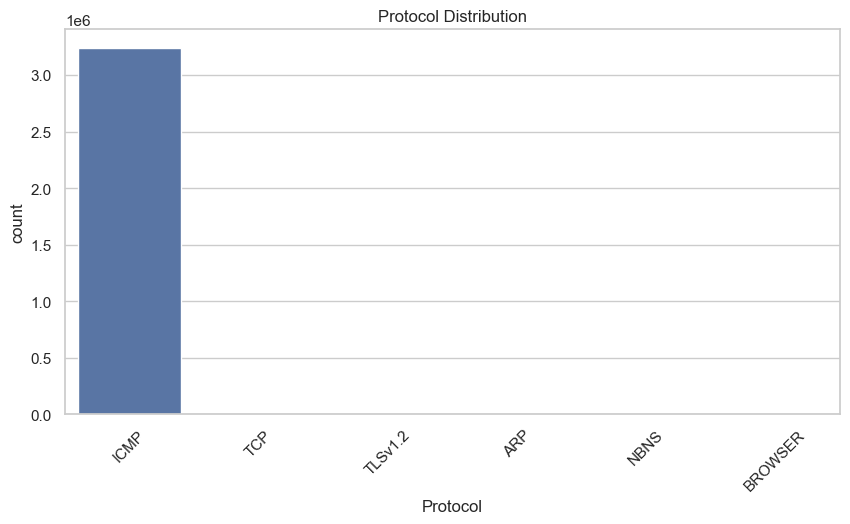

In [82]:
# Protocol distribution
protocol_counts = df['Protocol'].value_counts()
print(protocol_counts)

sns.countplot(data=df, x='Protocol', order=df['Protocol'].value_counts().index)
plt.title("Protocol Distribution")
plt.xticks(rotation=45)
plt.show()

The reason why most packets dont have the port values is that the ICMP, ARP protocol dont use port (these operate at Layer 2: Data link of TCP/IP Model) and most of packets in this dataset were ICMP packet. We will fix this by assign a value for this field.

Protocol
ICMP       3240656
ARP              0
BROWSER          0
NBNS             0
TCP              0
TLSv1.2          0
Name: bad_packet, dtype: int64


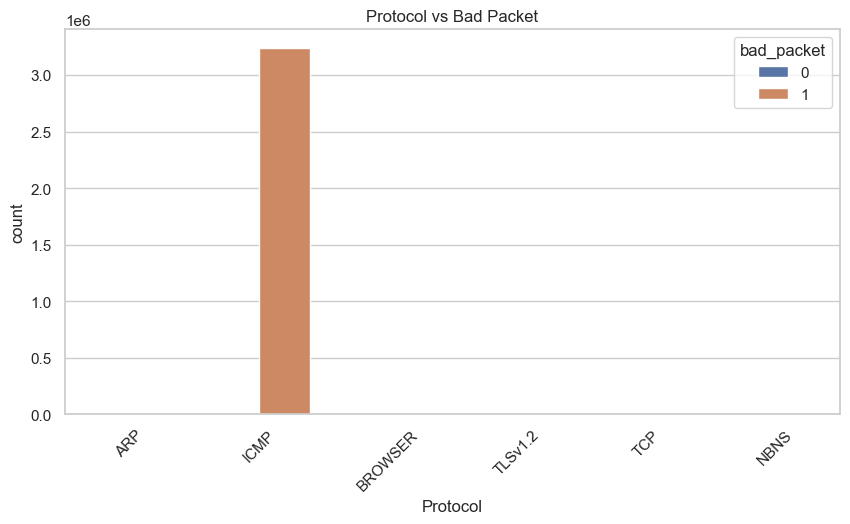

In [83]:
# Bad packet count per protocol
bad_packet_counts = df.groupby('Protocol')['bad_packet'].sum().sort_values(ascending=False)
print(bad_packet_counts)

sns.countplot(data=df, x='Protocol', hue='bad_packet')
plt.title("Protocol vs Bad Packet")
plt.xticks(rotation=45)
plt.show()

### 3. Clean data

We replace those NaN values in port field by '0'

In [84]:
df = df.fillna({'Source Port': 0, 'Destination Port': 0})

Convert data type of port to 'int64'

In [ ]:
df['Source Port'] = df['Source Port'].astype('int64')
df['Destination Port'] = df['Destination Port'].astype('int64')

# Confirm the change
print(df[['Source Port', 'Destination Port']].dtypes)


Source Port         int64
Destination Port    int64
dtype: object


Normalize the column name

In [86]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Remove duplicate data

In [87]:
df.drop_duplicates(inplace=True)

Look over the dataset

In [88]:
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245180 entries, 0 to 3245179
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              float64
 1   source            object 
 2   destination       object 
 3   protocol          object 
 4   length            int64  
 5   source_port       int64  
 6   destination_port  int64  
 7   bad_packet        int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 198.1+ MB

Missing values per column:
time                0
source              0
destination         0
protocol            0
length              0
source_port         0
destination_port    0
bad_packet          0
dtype: int64


,time,source,destination,protocol,length,source_port,destination_port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,0,0,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,0,0,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,0,0,0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60,0,0,0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60,0,0,0


### 4. Save processed data

In [89]:
df.to_csv('../data/processed/cleaned_dataset.csv', index=False)
print("✅ Cleaned dataset saved to /data/processed/cleaned_dataset.csv")
print(f"Final shape: {df.shape}")

✅ Cleaned dataset saved to /data/processed/cleaned_dataset.csv
Final shape: (3245180, 8)
